In [244]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_columns', 500)

# 4-1.

In [24]:
def d1(s,k,r,q,sigma,tau):
    return (np.log(s/k) + (r-q+(sigma**2)/2)*tau) / (sigma*np.sqrt(tau))

In [25]:
def d2(s,k,r,q,sigma,tau):
    return d1(s,k,r,q,sigma,tau) - sigma*np.sqrt(tau)

In [26]:
def calloptionPrice(s,k,r,q,sigma,tau):
    return s*np.exp(-q*tau)*ss.norm.cdf(d1(s,k,r,q,sigma,tau)) - k*np.exp(-r*tau)*ss.norm.cdf(d2(s,k,r,q,sigma,tau))

In [49]:
np.pi

3.141592653589793

In [234]:
def vega(S, K, r, q, T, sigma):
    _d1 = d1(S,K,r,q,sigma,T)
    return S * np.sqrt(T) * ss.norm.pdf(_d1)

In [70]:
T = 0.5
K = 15000
r = 0
q = 0
sigma = 0.2
S = 15000
sigma2 = 0.21

In [71]:
c1 = calloptionPrice(S,K,r,q,sigma,T)
c2 = calloptionPrice(S,K,r,q,sigma2,T)
c1
c2

845.5796669552492

887.782868747342

In [72]:
vega_sigma1 = vega(S, K, r, q, T, sigma)
vega_sigma2 = vega(S, K, r, q, T, sigma2)
vega_sigma1
vega_sigma2

4220.856534097573

4219.775078178168

In [73]:
theoretical_price = c1 + vega_sigma1 * 0.01
theoretical_price

887.7882322962249

In [74]:
actual_price = c2
actual_price

887.782868747342

In [75]:
difference_between_actual_theoretical = actual_price - theoretical_price
difference_between_actual_theoretical

-0.005363548882883151

이론적 가격은 887.788이고, 실제 가격은 887.783이다. 따라서, 그 차이는 0.005정도에 그친다.

실제 답지에서는 베가(vega_sigma1)를 4231.42라고 잘못 구한 것 같다. 직접 구해보면 다르게 나온다. 답지가 잘못되었다. 답지의 베가를 사용하면 이론적 가격이 잘못 나오고, 오차가 더 크게 나온다.

# 4-3.

In [253]:
def kappa(S, K, r, q, T, sigma):
    _d1 = d1(S,K,r,q,sigma,T)
    return S/(2*sigma)*np.sqrt(T/(np.pi*2)) * np.exp(-0.5*(_d1**2))

In [254]:
K = np.array([80, 90, 100, 110, 120])
S = np.linspace(60,140,100)
T = 0.25
sigma = 0.15
r = 0
q = 0

In [255]:
strike_ratio = 1/(K*K)
strike_ratio = strike_ratio/strike_ratio.sum()
strike_ratio

array([0.29381575, 0.23215072, 0.18804208, 0.15540668, 0.13058478])

In [256]:
kappa_df = pd.DataFrame(index=K,columns=S)
vega_df = pd.DataFrame(index=K,columns=S)
weighted_vega = kappa_df.copy()
for strike in K:
    i=0
    for spot in S:
        kappa_df.loc[strike,spot] = kappa(spot,strike,r,q,T,sigma)
        vega_df.loc[strike,spot] = vega(spot,strike,r,q,T,sigma)
    weighted_vega.loc[strike,:] = vega_df.loc[strike,:] * strike_ratio[i]
    i=i+1

In [257]:
weighted_vega_series = kappa_df.T @ strike_ratio

In [258]:
weighted_vega_df = pd.DataFrame(data = weighted_vega_series, columns = ["Weighted Average Kappa"])
result_df = pd.concat([kappa_df.T,weighted_vega_df],axis=1)

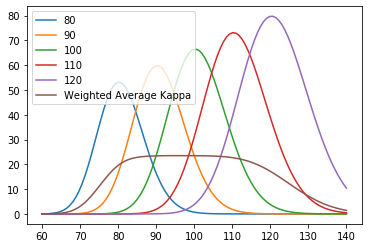

In [259]:
for col in result_df.columns:
    plt.plot(result_df.loc[:,col])
plt.legend(result_df.columns)
plt.show()